In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('drive/My Drive/FML Lab/Wine.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
x = data.iloc[:,:13].values

In [5]:
y = data.iloc[:,13].values

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.37281068, 0.18739996])

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[16,  0,  0],
       [ 1, 20,  0],
       [ 0,  0,  8]])

In [12]:
from sklearn.metrics import accuracy_score
prediction = accuracy_score(y_pred , y_test)
prediction*100

97.77777777777777

[Text(0.4166666666666667, 0.9375, 'x[1] <= 0.775\nentropy = 1.579\nsamples = 133\nvalue = [43, 50, 40]'),
 Text(0.3333333333333333, 0.8125, 'x[0] <= -0.862\nentropy = 1.257\nsamples = 88\nvalue = [43, 5, 40]'),
 Text(0.16666666666666666, 0.6875, 'x[1] <= 0.087\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.08333333333333333, 0.5625, 'entropy = 0.0\nsamples = 38\nvalue = [0, 0, 38]'),
 Text(0.25, 0.5625, 'x[1] <= 0.265\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.16666666666666666, 0.4375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3333333333333333, 0.4375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5, 0.6875, 'x[1] <= -0.042\nentropy = 0.42\nsamples = 47\nvalue = [43, 4, 0]'),
 Text(0.4166666666666667, 0.5625, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5833333333333334, 0.5625, 'x[0] <= 0.426\nentropy = 0.991\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(0.5, 0.4375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]')

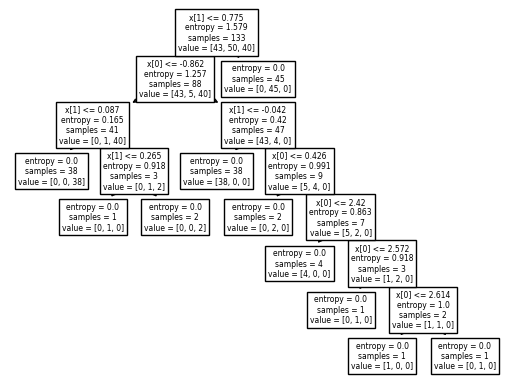

In [13]:
from sklearn import tree
tree.plot_tree(classifier)

<ipython-input-17-b06dfc28f56b>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],


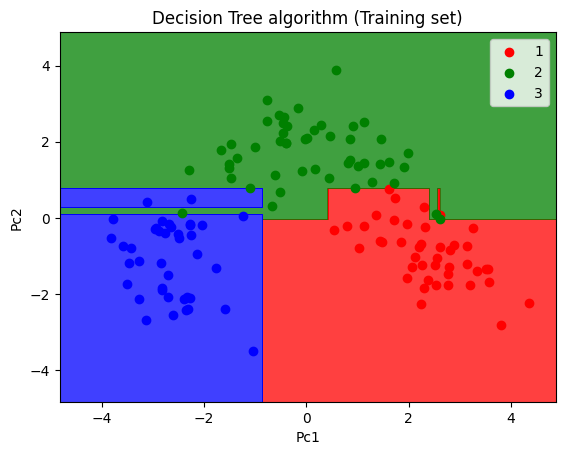

In [17]:
from matplotlib.colors import ListedColormap
x_set , y_set = x_train , y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,0].min()-1,stop = x_set[:,1].max()+1,step = 0.01 ))
plt.contourf(x1,x2 ,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha = 0.75 , cmap = ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i , j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c= ListedColormap(('red','green','blue'))(i),label = j)
plt.title('Decision Tree algorithm (Training set)')
plt.xlabel('Pc1')
plt.ylabel('Pc2')
plt.legend()
plt.show()

<ipython-input-19-cb67e2e75324>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],


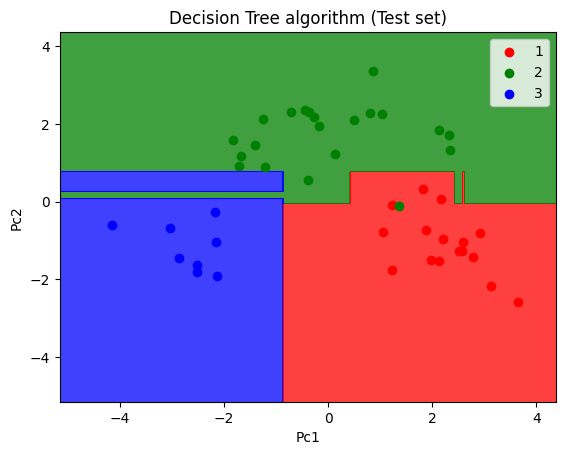

In [19]:
from matplotlib.colors import ListedColormap

x_set , y_set = x_test , y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,0].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape), alpha = 0.75 , cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i , j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c= ListedColormap(('red','green','blue'))(i),label = j)
plt.title('Decision Tree algorithm (Test set)')
plt.xlabel('Pc1')
plt.ylabel('Pc2')
plt.legend()
plt.show()